**Import Necessary Libraries**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
n_redundant=0, n_clusters_per_class=1,
flip_y=0.1, # adds a small amount of noise
class_sep=1.0, # classes are separable but not too easily
random_state=40)

In [3]:
print("Dataset:\n",X)
print()
print("Target:\n",y)

Dataset:
 [[-4.61464665 -3.2264618   4.54404187]
 [ 0.44579932  1.34683696  0.6670701 ]
 [ 0.74616408  0.36654281 -0.95794423]
 ...
 [ 1.55322678 -0.05594705  0.15149332]
 [-1.1087264  -0.96182012 -0.08996034]
 [ 0.91602176  1.53813433  1.07871276]]

Target:
 [1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0
 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0
 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0
 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 

In [4]:
print("X Shape=", X.shape)
print("y shape =", y.shape)

X Shape= (500, 3)
y shape = (500,)


**Relabel the Y targets to +1/-1**


In [5]:
y[y == 0] = -1
y
# y_ = np.where(y <= 0, -1, 1)
# y_

array([ 1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  1, -1,  1

**Split the dataset into training and testing datasets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 3)
X_test shape: (100, 3)
y_train shape: (400,)
y_test shape: (100,)


**Implement soft margin SVM**

**Use mini batch gradient descent to minimize the loss function**

In [7]:
class SoftMarginSVM:
    def __init__(self, C=1.0, learning_rate=0.01, max_iters=1000, batch_size=20, tol=1e-4, random_state=10):
        self.C = C  # regularization parameter
        self.learning_rate = learning_rate  # learning rate for gradient descent
        self.max_iters = max_iters  # maximum number of iterations
        self.batch_size = batch_size  # mini-batch size
        self.tol = tol  # tolerance for stopping criterion
        self.random_state = random_state  # random seed for reproducibility
        self.W = None  # weights
        self.b = None  # bias term
        self.loss_history = []  # history of loss values

    def fit(self, X, y):
        # Initialize weights and bias
        np.random.seed(self.random_state)
        self.W = np.random.randn(X.shape[1])
        self.b = np.random.randn(1)

        n_samples, n_features = X.shape
        n_batches = n_samples // self.batch_size

        for _ in range(self.max_iters):
            total_loss = 0.0
            for batch in range(n_batches):
                # Select mini-batch
                batch_indices = np.random.choice(n_samples, size=self.batch_size, replace=False)
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                # Compute gradient
                margin = 1 - y_batch * (np.dot(X_batch, self.W) + self.b)
                mask = margin > 0
                dW = -2 * self.C * np.dot(X_batch[mask].T, y_batch[mask]) / self.batch_size
                db = -2 * self.C * np.sum(y_batch[mask]) / self.batch_size

                # Update weights and bias
                self.W -= self.learning_rate * dW
                self.b -= self.learning_rate * db

                # Compute loss for the current mini-batch
                loss = np.mean(np.maximum(0, 1 - y_batch * (np.dot(X_batch, self.W) + self.b)))
                total_loss += loss

            # Calculate average loss for the epoch
            avg_loss = total_loss / n_batches
            self.loss_history.append(avg_loss)

        return self.W, self.b
    
    def predict(self, X):
        return np.sign(np.dot(X, self.W) + self.b)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)
    
    def decision_function(X, W, b):
        return np.sign(np.dot(X, W) + b)

In [8]:
svm = SoftMarginSVM()
# Train the model using the training data
W, b = svm.fit(X_train, y_train)

**Return the optimal weights by minimizing the loss function**

In [9]:
W

array([-0.66518441, -0.87836595, -0.6126113 ])

**Perform some predictions on the test data**

In [10]:
y_pred = svm.predict(X_test)
y_pred

array([-1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
       -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1., -1., -1., -1.])

**Calculate the accuracy score**


In [11]:
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.88


**Visualize the training data and decision boundary in 3D**

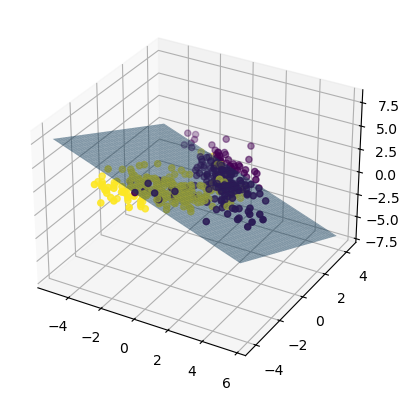

In [12]:
# Visualize the training data and decision boundary in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of training data
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=y_train)

# Creating a meshgrid to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.dot(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())], W.T) + b
Z = Z.reshape(xx.shape)

# Plot decision boundary
ax.plot_surface(xx, yy, Z, alpha=0.5)
plt.show()

**Visualize the loss function over time during training**

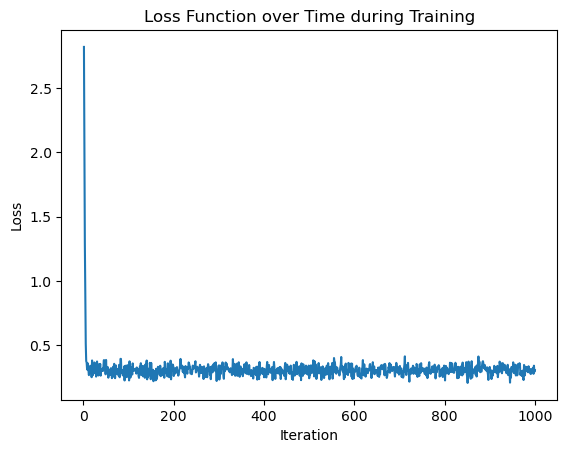

In [13]:
plt.plot(range(1, len(svm.loss_history) + 1), svm.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function over Time during Training')
plt.show()